In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv(r"E:\Jupyter Notebooks\catMissingdata.csv",
                 usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

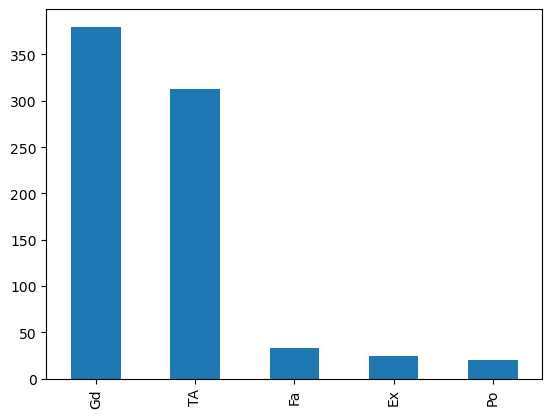

In [7]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

In [8]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [13]:
df[df['FireplaceQu'] == 'Gd']['SalePrice']

3       140000
6       307000
11      345000
13      279500
20      325300
         ...  
1437    394617
1440    191000
1443    121000
1451    287090
1457    266500
Name: SalePrice, Length: 380, dtype: int64

In [14]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

### Distribution of the saleprice column where col val is equal to mode and equal to null

Note : 

df[df['FireplaceQu'] == np.nan]['SalePrice'].plot(kind = 'kde', label = 'value=nan')

The key issue here is how np.nan behaves in comparisons. In Python (and in most programming languages), np.nan is designed to represent "Not a Number," and it has the unique property that it is not equal to itself. This means that:

np.nan == np.nan
will return False. Therefore, when you use np.nan in a comparison within a DataFrame, such as:

df['FireplaceQu'] == np.nan
the result is a Series of False values, since no element can be equal to np.nan. This effectively means you are selecting an empty DataFrame, which is why you get a zero-size array error when you try to plot it.

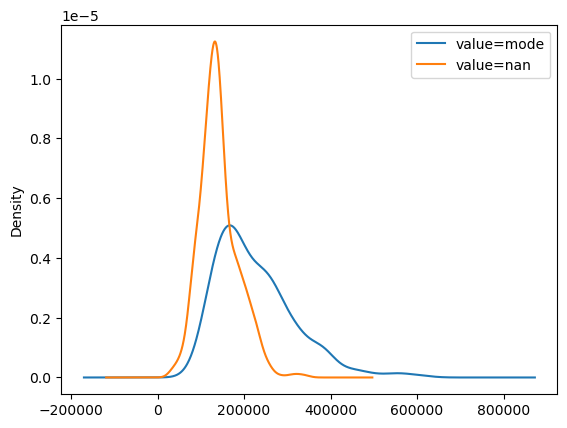

In [20]:
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', label = 'value=mode')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', label = 'value=nan')
plt.legend()

### Mode Imputation

In [29]:
mode = df['FireplaceQu'].mode()[0] #or use this where [0] extracts the mode value from the series generated
df['FireplaceQu'].fillna(mode)

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

In [24]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [26]:
df['FireplaceQu'].fillna('Gd', inplace = True)

### Distribution of the saleprice column where col val is equal to mode before and after mode imputation

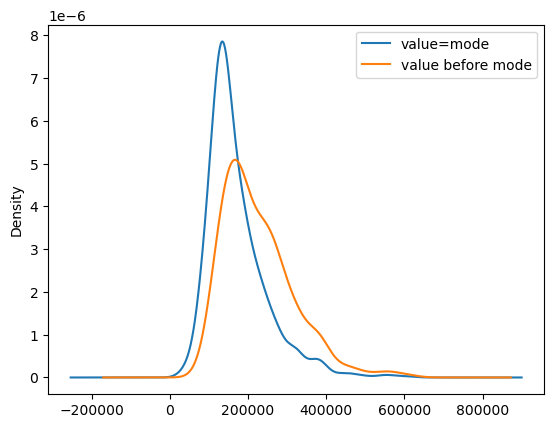

In [28]:
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', label = 'value=mode')
temp.plot(kind = 'kde', label = 'value before mode')
plt.legend()

### Repeating the above same steps for the other column with null values

In [30]:
df.isnull().sum()

FireplaceQu     0
GarageQual     81
SalePrice       0
dtype: int64

<AxesSubplot:>

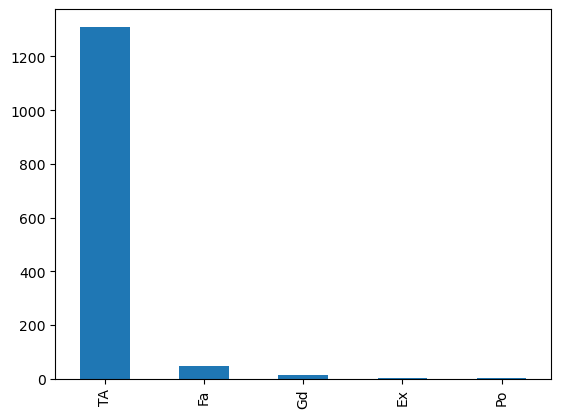

In [31]:
df['GarageQual'].value_counts().plot(kind = 'bar')

In [33]:
df['GarageQual'].mode()[0]

'TA'

In [34]:
temp = df[df['GarageQual']=='TA']['SalePrice']

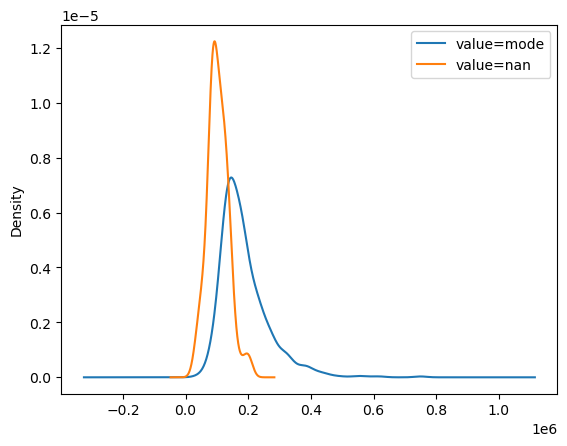

In [35]:
df[df['GarageQual']=='TA']['SalePrice'].plot(kind = 'kde', label = 'value=mode')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', label = 'value=nan')
plt.legend()

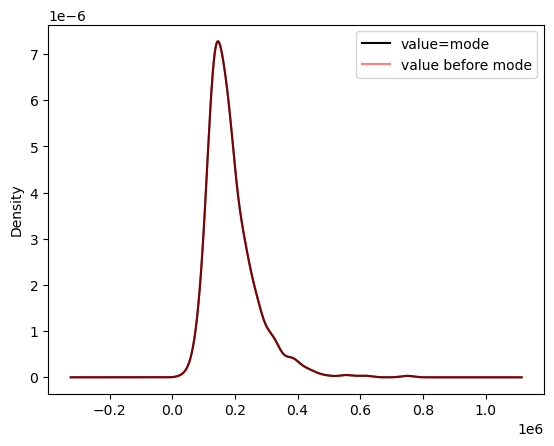

In [40]:
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', label = 'value=mode', color = 'black')
temp.plot(kind = 'kde', label = 'value before mode', color = 'red', alpha = 0.5)
plt.legend()
# we got almost the same overlapping plots

In [46]:
# before simpleimputer make sure to do train test split , here we are skipping since the topic isn't that here

In [48]:
si = SimpleImputer(strategy = 'most_frequent')

In [49]:
ct = ColumnTransformer([
    ('first', si, ['GarageQual','FireplaceQu'])
], remainder = 'passthrough')

In [50]:
data = ct.fit_transform(df)

In [51]:
data

array([['TA', 'Gd', 208500],
       ['TA', 'TA', 181500],
       ['TA', 'TA', 223500],
       ...,
       ['TA', 'Gd', 266500],
       ['TA', 'Gd', 142125],
       ['TA', 'Gd', 147500]], dtype=object)

In [54]:
ct.named_transformers_['first'].statistics_

array(['TA', 'Gd'], dtype=object)

In [55]:
# other way
si = SimpleImputer(strategy = 'most_frequent')
data = si.fit_transform(df)

In [56]:
si.statistics_

array(['Gd', 'TA', 140000], dtype=object)